In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1.loss graph

In [ ]:
os.chdir('/content/drive/MyDrive/mini/cloud_result')

In [ ]:
loss1=pd.read_csv('loss1.csv')
loss2=pd.read_csv('loss2.csv')
loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss5=pd.read_csv('loss_comparison.csv')

<Axes: >

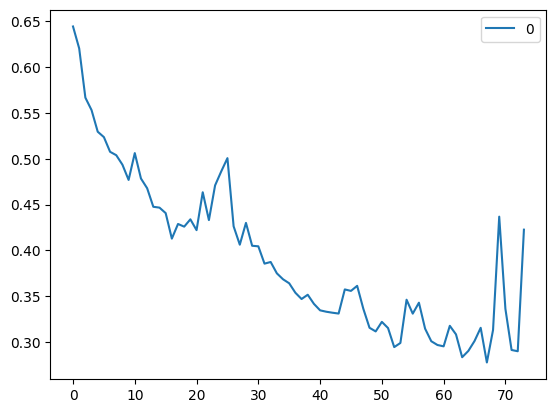

In [ ]:
sns.lineplot(data=loss1)

<Axes: >

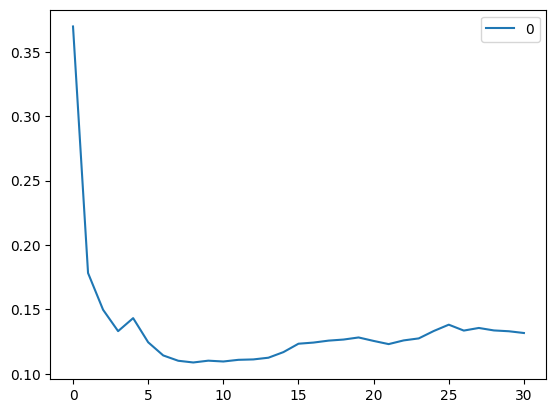

In [ ]:
sns.lineplot(data=loss2)

<Axes: >

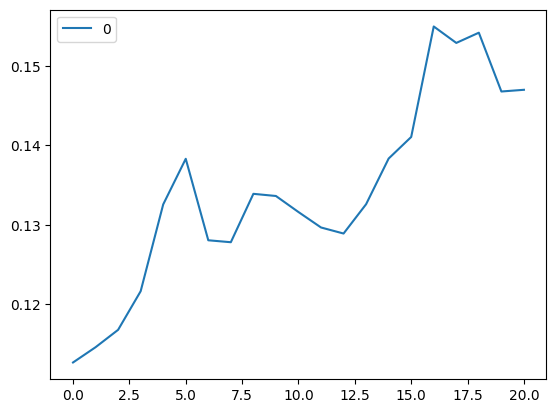

In [ ]:
sns.lineplot(data=loss3)

<Axes: >

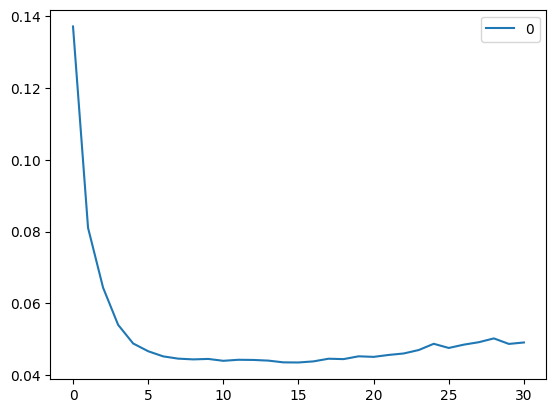

In [ ]:
sns.lineplot(data=loss4)

<Axes: >

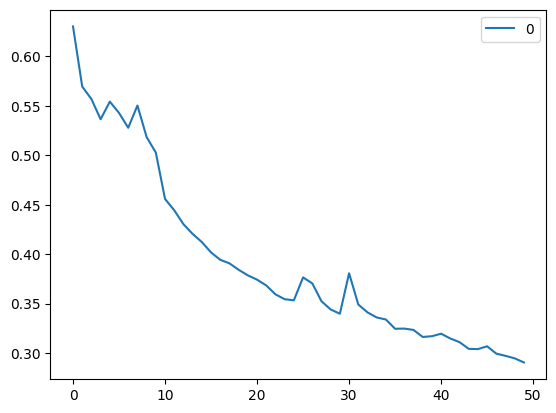

In [ ]:
sns.lineplot(data=loss5)

In [ ]:
log=pd.read_csv('training.log',sep='|',header=None)

In [ ]:
log

,0
0,[?2004h(base) jupyter@instance-20241220-16525...
1,[?2004l
2,-------phase1-------
3,--- Data Preparation ---
4,optimal threshold: 0.34170690178871155
...,...
2085073,Specificity : 0.8203636363636364
2085074,"Testing AUROC: 0.8608140588036499 , AUPRC: 0.8..."
2085075,-------training finished-------
2085076,9106.215451204776


In [ ]:
log[log[0]=='-------phase1-------']

,0
2,-------phase1-------


In [ ]:
log[log[0]=='-------phase2--------']

,0
72234,-------phase2--------


In [ ]:
log[log[0]=='-------phase3--------']

,0
818137,-------phase3--------


In [ ]:
log[log[0]=='-------phase4--------']

,0
1323431,-------phase4--------


In [ ]:
log[log[0]=='-------phase5--------']

,0
2069333,-------phase5--------


In [ ]:
log1=log.iloc[2:72234]
log2=log.iloc[72234:818137]
log3=log.iloc[818137:1323431]
log4=log.iloc[1323431:2069333]
log5=log.iloc[2069333:]

In [ ]:
log1.head(20)

,0
2,-------phase1-------
3,--- Data Preparation ---
4,optimal threshold: 0.34170690178871155
5,AUROC:0.531004619243493
6,AUPRC: 0.5291906279876609
7,Confusion Matrix :
8,[[ 0 2726]
9,[ 0 2770]]
10,Recall : 1.0
11,Precision : 0.5040029112081513


In [ ]:
log1v=log1[log1[0].str.contains('Validation')].copy()
log2v=log2[log2[0].str.contains('Validation')].copy()
log3v=log3[log3[0].str.contains('Validation')].copy()
log4v=log4[log4[0].str.contains('Validation')].copy()
log5v=log5[log5[0].str.contains('Validation')].copy()

In [ ]:
log1v.reset_index(drop=True,inplace=True)
log2v.reset_index(drop=True,inplace=True)
log3v.reset_index(drop=True,inplace=True)
log4v.reset_index(drop=True,inplace=True)
log5v.reset_index(drop=True,inplace=True)

In [ ]:
small=[log1v,log2v,log3v,log4v,log5v]
big=[[],[],[],[],[]]
for i in range(5):
  frame=small[i]
  bucket=big[i]
  for j in range(len(frame)):
    bucket.append(float(frame.loc[j,0].split(' , ')[4].split(': ')[1]))

In [ ]:
big=list(map(lambda x : pd.DataFrame(x),big))

In [ ]:
big[0]

,0
0,0.696358
1,0.868475
2,0.905475
3,0.802359
4,0.558498
...,...
69,0.826873
70,0.486516
71,0.454372
72,0.479641


In [ ]:
loss1.shape

(74, 1)

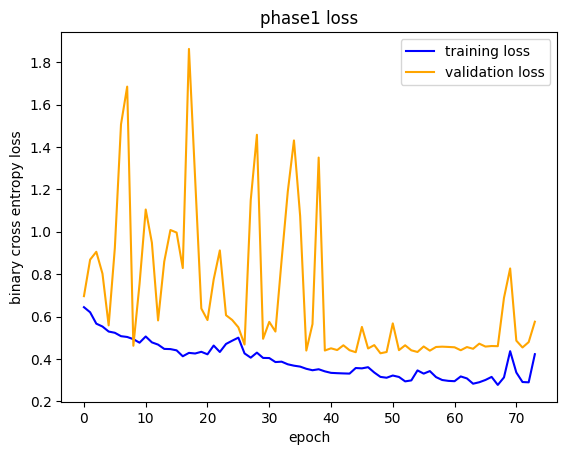

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=loss1['0'], color='blue', label='training loss')
sns.lineplot(data=big[0][0], color='orange', label='validation loss')

plt.title('phase1 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#54 epoch AUROC: 0.8932638264864957

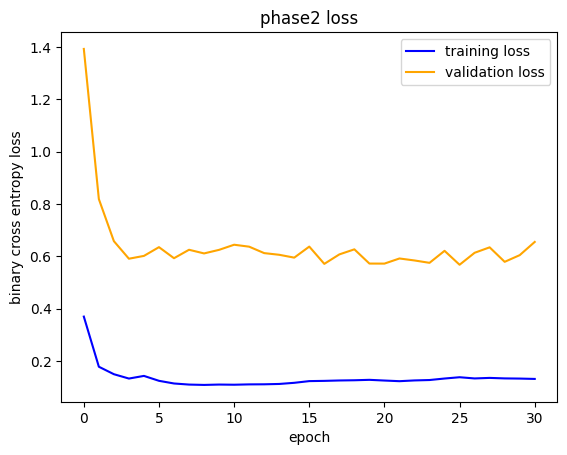

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=loss2['0'], color='blue', label='training loss')
sns.lineplot(data=big[1][0], color='orange', label='validation loss')

plt.title('phase2 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 11epoch AUROC: 0.8804466572635077

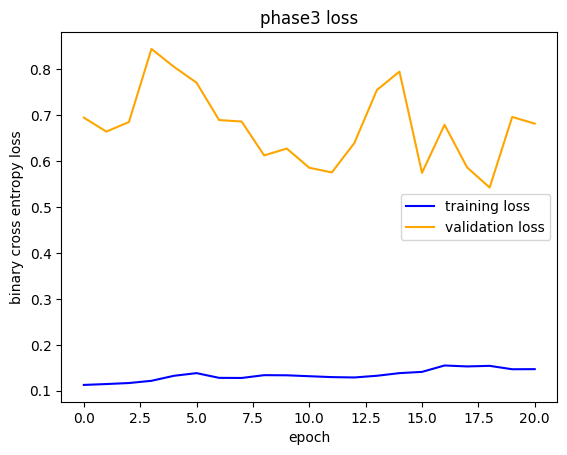

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=big[2][0], color='orange', label='validation loss')

plt.title('phase3 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#1epoch AUROC: 0.8605762652280317

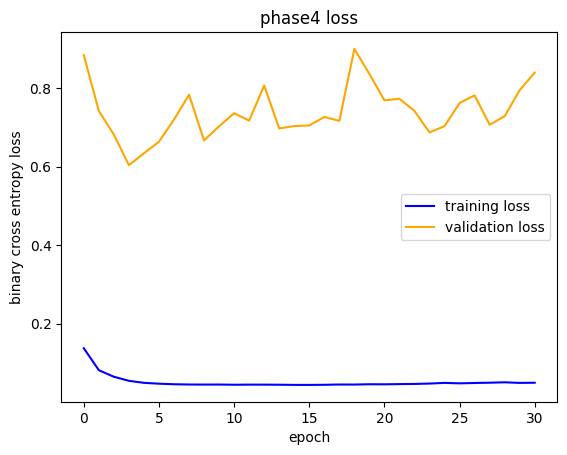

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=big[3][0], color='orange', label='validation loss')

plt.title('phase4 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()
#11 epoch AUROC: 0.8787691641623796

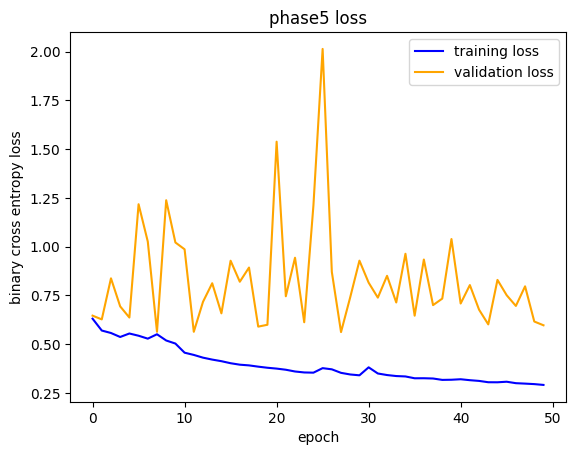

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=loss5['0'], color='blue', label='training loss')
sns.lineplot(data=big[4][0], color='orange', label='validation loss')

plt.title('phase5 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#30 epoch AUROC: 0.865874430569342 / 모델 구조만 바꾸고 data는 19000

#2.data analysis

In [ ]:
!pip install Rdkit

In [ ]:
train=pd.read_csv('../train.csv')
test=pd.read_csv('../test.csv')
valid=pd.read_csv('../val.csv')
unlabel=pd.read_csv('../result.csv')

In [ ]:
trainsmile=pd.DataFrame(set(train['SMILES']))
testsmile=pd.DataFrame(set(test['SMILES']))
validsmile=pd.DataFrame(set(valid['SMILES']))
unlabelsmile=pd.DataFrame(set(unlabel['SMILES']))

In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs, MACCSkeys

trainsmile['Molecule'] = trainsmile[0].apply(Chem.MolFromSmiles)
validsmile['Molecule'] = validsmile[0].apply(Chem.MolFromSmiles)
testsmile['Molecule'] = testsmile[0].apply(Chem.MolFromSmiles)
unlabelsmile['Molecule'] = unlabelsmile[0].apply(Chem.MolFromSmiles)
unlabelsmile.dropna(inplace=True)
unlabelsmile.reset_index(drop=True,inplace=True)

trainsmile['Fingerprint'] = trainsmile['Molecule'].apply(lambda x: MACCSkeys.GenMACCSKeys(x))
validsmile['Fingerprint'] = validsmile['Molecule'].apply(lambda x: MACCSkeys.GenMACCSKeys(x))
testsmile['Fingerprint'] = testsmile['Molecule'].apply(lambda x: MACCSkeys.GenMACCSKeys(x))
unlabelsmile['Fingerprint'] = unlabelsmile['Molecule'].apply(lambda x: MACCSkeys.GenMACCSKeys(x))

def get_similarlity(standarddf, targetdf, threshold):
  count=0
  for i in range(len(standarddf)):
    stancount=0
    standard=standarddf.loc[i,'Fingerprint']
    for j in range(len(targetdf)):
      target=targetdf.loc[j,'Fingerprint']
      similarity=DataStructs.TanimotoSimilarity(standard,target) # tanimoto 유사도 ?
      if similarity>=threshold:
        stancount+=1
        break
    if stancount>=1:
      count+=1
  return count, len(standarddf), count/len(standarddf)

[10:38:26] Unusual charge on atom 0 number of radical electrons set to zero
[10:38:28] Unusual charge on atom 0 number of radical electrons set to zero
[10:38:30] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 25
[10:38:32] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:38:32] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:38:33] Explicit valence for atom # 22 N, 4, is greater than permitted


In [ ]:
print(get_similarlity(trainsmile,validsmile,0.85))
print(get_similarlity(trainsmile,testsmile,0.85))
print(get_similarlity(trainsmile,unlabelsmile,0.85))
print(get_similarlity(unlabelsmile,validsmile,0.85))
print(get_similarlity(unlabelsmile,testsmile,0.85))

(2630, 4400, 0.5977272727272728)
(3477, 4400, 0.7902272727272728)
(1045, 4400, 0.2375)
(965, 7161, 0.1347577154028767)
(1316, 7161, 0.18377321603128055)


In [ ]:
trainpro=pd.DataFrame(set(train['Target Sequence']))
testpro=pd.DataFrame(set(test['Target Sequence']))
validpro=pd.DataFrame(set(valid['Target Sequence']))
unlabelpro=pd.DataFrame(set(unlabel['Target Sequence']))

In [ ]:
!pip install BIo

In [ ]:
trainpro

,0
0,MGAPTLPPAWQPFLKDHRISTFKNWPFLEGCACTPERMAEAGFIHC...
1,MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINT...
2,METGALRRPQLLPLLLLLCGGCPRAGGCNETGMLERLPLCGKAFAD...
3,MGPRSRERRAGAVQNTNDSSALSKRSLAARGYVQDPFAALLVPGAA...
4,MPGPRRPAGSRLRLLLLLLLPPLLLLLRGSHAGNLTVAVVLPLANT...
...,...
2171,MAVPETRPNHTIYINNLNEKIKKDELKKSLYAIFSQFGQILDILVS...
2172,MSGVRGLSRLLSARRLALAKAWPTVLQTGTRGFHFTVDGNKRASAK...
2173,MPRHHAGGEEGGAAGLWVKSGAAAAAAGGGRLGSGMKDVESGRGRV...
2174,MKYTSYILAFQLCIVLGSLGCYCQDPYVKEAENLKKYFNAGHSDVA...


In [ ]:
unlabelpro

,0
0,MAASSLEQKLSRLEAKLKQENREARRRIDLNLDISPQRPRPTLQLP...
1,MDTKHFLPLDFSTQVNSSLTSPTGRGSMAAPSLHPSLGPGIGSPGQ...
2,MRGRRGRPPKQPAAPAAERCAPAPPPPPPPPTSGPIGGLRSRHRGS...
3,MSEDSSALPWSINRDDYELQEVIGSGATAVVQAAYCAPKKEKVAIK...
4,MPQLYIYIRLLGAYLFIISRVQGQNLDSMLHGTGMKSDSDQKKSEN...
...,...
1249,MEEKQILCVGLVVLDVISLVDKYPKEDSEIRCLSQRWQRGGNASNS...
1250,MASPDWGYDDKNGPEQWSKLYPIANGNNQSPVDIKTSEAKHDTSLK...
1251,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...
1252,MNTSVPPAVSPNITVLAPGKGPWQVAFIGITTGLLSLATVTGNLLV...


In [ ]:
testpro

,0
0,MNKPLLWISVLTSLLEAFAHTDLSGKVFVFPRESVTDHVNLITPLE...
1,MDTKHFLPLDFSTQVNSSLTSPTGRGSMAAPSLHPSLGPGIGSPGQ...
2,MADGQVAELLLRRLEASDGGLDSAELAAELGMEHQAVVGAVKSLQA...
3,MVNLLQIVRDHWVHVLVPMGFVIGCYLDRKSDERLTAFRNKSMLFK...
4,MDMRVPAQLLGLLLLWLSGARCDIQMTQSPSSLSASVGDRVTITCQ...
...,...
1806,MATALMAVVLRAAAVAPRLRGRGGTGGARRLSCGARRRAARGTSPG...
1807,MAHRCLRLWGRGGCWPRGLQQLLVPGGVGPGEQPCLRTLYRFVTTQ...
1808,MKFNPFVTSDRSKNRKRHFNAPSHVRRKIMSSPLSKELRQKYNVRS...
1809,MAEVQVLVLDGRGHLLGRLAAIVAKQVLLGRKVVVVRCEGINISGN...


In [ ]:
from Bio import pairwise2

def calculate_similarity(standarddf,targetdf):
  bucket=0
  for i in range(len(standarddf)):
    standard=standarddf.loc[i,0]
    for j in range(len(targetdf)):
      target=targetdf.loc[j,0]
      alignments = pairwise2.align.globalxx(standard, target)
      best_alignment = alignments[0]  # 가장 높은 점수의 정렬
      matches = best_alignment[2]  # 일치하는 아미노산 수
      max_length = max(len(standard), len(target))
      similarity = matches / max_length
      bucket+=similarity
    return bucket, bucket/(len(standarddf)*len(targetdf))

In [ ]:
from Bio import pairwise2
from Bio.Align import substitution_matrices

def calculate_similarity_blosum(standarddf, targetdf):
    # BLOSUM62 점수 매트릭스 로드
    blosum62 = substitution_matrices.load("BLOSUM62")
    # 갭 페널티 설정
    gap_open = -10  # 갭을 여는 비용
    gap_extend = -0.5  # 갭을 연장하는 비용

    bucket = 0
    for i in range(len(standarddf)):
        standard = standarddf.loc[i, 0]  # 기준 서열
        for j in range(len(targetdf)):
            target = targetdf.loc[j, 0]  # 대상 서열

            # BLOSUM62를 사용한 글로벌 정렬 수행
            alignments = pairwise2.align.globalds(standard, target, blosum62, gap_open, gap_extend)

            # 가장 높은 점수의 정렬 가져오기
            best_alignment = alignments[0]
            matches = best_alignment[2]  # 정렬 점수
            max_length = max(len(standard), len(target))  # 두 서열의 최대 길이

            # 유사도 계산
            similarity = matches / max_length
            bucket += similarity

    # 평균 유사도 계산
    total_pairs = len(standarddf) * len(targetdf)
    average_similarity = bucket / total_pairs

    return average_similarity

In [ ]:
from Bio import pairwise2
from Bio.Align import substitution_matrices

blosum62 = substitution_matrices.load("BLOSUM62")
alignments = pairwise2.align.globalds(trainpro.loc[0,0], testpro.loc[0,0], blosum62, -10, -0.5)
print(alignments)

[Alignment(seqA='MNKPLLWISVLTSLLEAFAHTDLSGKVFVFPRESVTDHVNLITPLEKPLQNFTLCFRAYSDLSRAYSLFSYNTQGRDNELLVYKERVGEYSLYIGRHKVTSKVIEKFPAPVHICVSWESSSGIAEFWINGTPLVKKGLRQGYFVEAQPKIVLGQEQDSYGGKFDRSQSFVGEIGDLYMWDSVLPPENILSAYQGTPLPANILDWQALNYEIRGYVIIKPLVWV', seqB='MNKPLLWISVLTSLLEAFAHTDLSGKVFVFPRESVTDHVNLITPLEKPLQNFTLCFRAYSDLSRAYSLFSYNTQGRDNELLVYKERVGEYSLYIGRHKVTSKVIEKFPAPVHICVSWESSSGIAEFWINGTPLVKKGLRQGYFVEAQPKIVLGQEQDSYGGKFDRSQSFVGEIGDLYMWDSVLPPENILSAYQGTPLPANILDWQALNYEIRGYVIIKPLVWV', score=1178.0, start=0, end=223)]


In [ ]:
print(calculate_similarity(trainpro,validpro))
print(calculate_similarity(trainpro,testpro))
print(calculate_similarity(trainpro,unlabelpro))
print(calculate_similarity(unlabelpro,validpro))
print(calculate_similarity(unlabelpro,testpro))

(260.3693068765892, 8.837150099806034e-05)
(350.2826271248388, 8.888761569535205e-05)
(226.03510253290125, 8.283606522836528e-05)
(302.6240294669361, 0.00017823262721296937)
(402.75727408639585, 0.00017734845362268498)


In [ ]:
unlabel['SMILES'].value_counts()

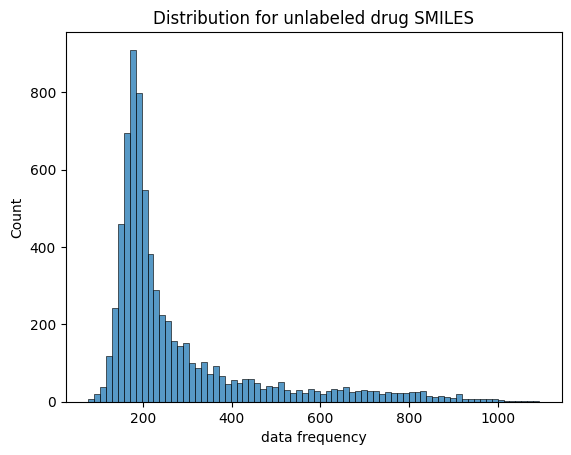

In [ ]:
sns.histplot(data=unlabel['SMILES'].value_counts())
plt.title('Distribution for unlabeled drug SMILES')
plt.xlabel('data frequency')
plt.show()

In [ ]:
train['SMILES'].value_counts()

,count
SMILES,
NC(=O)C1=CN(C=CC1)[C@@H]1O[C@H](CO[P@](O)(=O)O[P@](O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=NC3=C(N)N=CN=C23)[C@@H](O)[C@H]1O,108
CCO,50
CN1CCN(CC1)C1=NC2=CC=CC=C2NC2=C1C=C(C)S2,48
N[C@@H](CCC(O)=O)C(O)=O,47
CC1=NC=C(COP(O)(O)=O)C(C=O)=C1O,42
...,...
[H][C@](CO)(CCC1=CC=CC2=C1C=CC=C2)N1C=NC(=C1)C(N)=O,1
[H][C@](N)(CCC(=O)NC1=CC=C(OCC2=CC=CC=C2)C=C1)C(O)=O,1
NCCCOC1=CC=C(C=C1)C1=C(NN=C1)C1=CC(Cl)=C(O)C=C1O,1


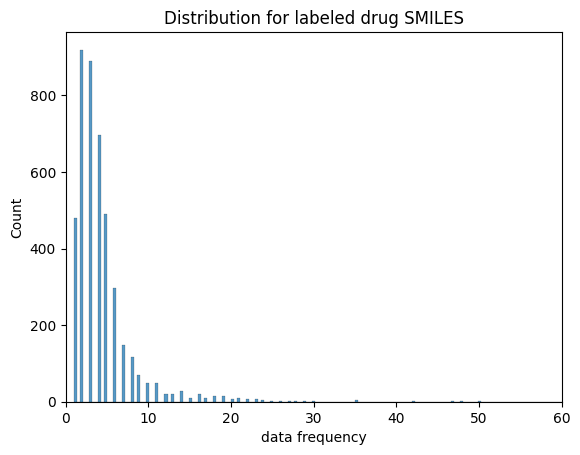

In [ ]:
sns.histplot(data=train['SMILES'].value_counts())
plt.xlabel('data frequency')
plt.title('Distribution for labeled drug SMILES')
plt.xlim(0,60)
plt.show()

In [ ]:
unlabel['Target Sequence'].value_counts()

,count
Target Sequence,
MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPFLGNILSYHKGFCMFDMECHKKYGKVWGFYDGQQPVLAITDPDMIKTVLVKECYSVFTNRRPFGPVGFMKSAISIAEDEEWKRLRSLLSPTFTSGKLKEMVPIIAQYGDVLVRNLRREAETGKPVTLKDVFGAYSMDVITSTSFGVNIDSLNNPQDPFVENTKKLLRFDFLDPFFLSITVFPFLIPILEVLNICVFPREVTNFLRKSVKRMKESRLEDTQKHRVDFLQLMIDSQNSKETESHKALSDLELVAQSIIFIFAGYETTSSVLSFIMYELATHPDVQQKLQEEIDAVLPNKAPPTYDTVLQMEYLDMVVNETLRLFPIAMRLERVCKKDVEINGMFIPKGVVVMIPSYALHRDPKYWTEPEKFLPERFSKKNKDNIDPYIYTPFGSGPRNCIGMRFALMNMKLALIRVLQNFSFKPCKETQIPLKLSLGGLLQPEKPVVLKVESRDGTVSGA,7162
MSALGVTVALLVWAAFLLLVSMWRQVHSSWNLPPGPFPLPIIGNLFQLELKNIPKSFTRLAQRFGPVFTLYVGSQRMVVMHGYKAVKEALLDYKDEFSGRGDLPAFHAHRDRGIIFNNGPTWKDIRRFSLTTLRNYGMGKQGNESRIQREAHFLLEALRKTQGQPFDPTFLIGCAPCNVIADILFRKHFDYNDEKFLRLMYLFNENFHLLSTPWLQLYNNFPSFLHYLPGSHRKVIKNVAEVKEYVSERVKEHHQSLDPNCPRDLTDCLLVEMEKEKHSAERLYTMDGITVTVADLFFAGTETTSTTLRYGLLILMKYPEIEEKLHEEIDRVIGPSRIPAIKDRQEMPYMDAVVHEIQRFITLVPSNLPHEATRDTIFRGYLIPKGTVVVPTLDSVLYDNQEFPDPEKFKPEHFLNENGKFKYSDYFKPFSTGKRVCAGEGLARMELFLLLCAILQHFNLKPLVDPKDIDLSPIHIGFGCIPPRYKLCVIPRS,7159
MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADGHRGPSAAFAPAAAEPKLFGGFNSSDTVTSPQRAGPLAGGVTTFVALYDYESRTETDLSFKKGERLQIVNNTEGDWWLAHSLSTGQTGYIPSNYVAPSDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGLCHRLTTVCPTSKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTRVAIKTLKPGTMSPEAFLQEAQVMKKLRHEKLVQLYAVVSEEPIYIVTEYMSKGSLLDFLKGETGKYLRLPQLVDMAAQIASGMAYVERMNYVHRDLRAANILVGENLVCKVADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELTTKGRVPYPGMVNREVLDQVERGYRMPCPPECPESLHDLMCQCWRKEPEERPTFEYLQAFLEDYFTSTEPQYQPGENL,7157
MEMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRYRDVSPFDHSRIKLHQEDNDYINASLIKMEEAQRSYILTQGPLPNTCGHFWEMVWEQKSRGVVMLNRVMEKGSLKCAQYWPQKEEKEMIFEDTNLKLTLISEDIKSYYTVRQLELENLTTQETREILHFHYTTWPDFGVPESPASFLNFLFKVRESGSLSPEHGPVVVHCSAGIGRSGTFCLADTCLLLMDKRKDPSSVDIKKVLLEMRKFRMGLIQTADQLRFSYLAVIEGAKFIMGDSSVQDQWKELSHEDLEPPPEHIPPPPRPPKRILEPHNGKCREFFPNHQWVKEETQEDKDCPIKEEKGSPLNAAPYGIESMSQDTEVRSRVVGGSLRGAQAASPAKGEPSLPEKDEDHALSYWKPFLVNMCVATVLTAGAYLCYRFLFNSNT,7156
MGETLGDSPIDPESDSFTDTLSANISQEMTMVDTEMPFWPTNFGISSVDLSVMEDHSHSFDIKPFTTVDFSSISTPHYEDIPFTRTDPVVADYKYDLKLQEYQSAIKVEPASPPYYSEKTQLYNKPHEEPSNSLMAIECRVCGDKASGFHYGVHACEGCKGFFRRTIRLKLIYDRCDLNCRIHKKSRNKCQYCRFQKCLAVGMSHNAIRFGRMPQAEKEKLLAEISSDIDQLNPESADLRALAKHLYDSYIKSFPLTKAKARAILTGKTTDKSPFVIYDMNSLMMGEDKIKFKHITPLQEQSKEVAIRIFQGCQFRSVEAVQEITEYAKSIPGFVNLDLNDQVTLLKYGVHEIIYTMLASLMNKDGVLISEGQGFMTREFLKSLRKPFGDFMEPKFEFAVKFNALELDDSDLAIFIAVIILSGDRPGLLNVKPIEDIQDNLLQALELQLKLNHPESSQLFAKLLQKMTDLRQIVTEHVQLLQVIKKTETDMSLHPLLQEIYKDLY,7155
...,...
MKIIIFRVLTFFFVIFSVNVVAKEFTLDFSTAKTYVDSLNVIRSAIGTPLQTISSGGTSLLMIDSGTGDNLFAVDVRGIDPEEGRFNNLRLIVERNNLYVTGFVNRTNNVFYRFADFSHVTFPGTTAVTLSGDSSYTTLQRVAGISRTGMQINRHSLTTSYLDLMSHSGTSLTQSVARAMLRFVTVTAEALRFRQIQRGFRTTLDDLSGRSYVMTAEDVDLTLNWGRLSSVLPDYHGQDSVRVGRISFGSINAILGSVALILNCHHHASRVARMASDEFPSMCPADGRVRGITHNKILWDSSTLGAILMRRTISS,139
MDKNELVQKAKLAEQAERYDDMAACMKSVTEQGAELSNEERNLLSVAYKNVVGARRSSWRVVSSIEQKTEGAEKKQQMAREYREKIETELRDICNDVLSLLEKFLIPNASQAESKVFYLKMKGDYYRYLAEVAAGDDKKGIVDQSQQAYQEAFEISKKEMQPTHPIRLGLALNFSVFYYEILNSPEKACSLAKTAFDEAIAELDTLSEESYKDSTLIMQLLRDNLTLWTSDTQGDEAEAGEGGEN,136
MPEAPPLLLAAVLLGLVLLVVLLLLLRHWGWGLCLIGWNEFILQPIHNLLMGDTKEQRILNHVLQHAEPGNAQSVLEAIDTYCEQKEWAMNVGDKKGKIVDAVIQEHQPSVLLELGAYCGYSAVRMARLLSPGARLITIEINPDCAAITQRMVDFAGVKDKVTLVVGASQDIIPQLKKKYDVDTLDMVFLDHWKDRYLPDTLLLEECGLLRKGTVLLADNVICPGAPDFLAHVRGSSCFECTHYQSFLEYREVVDGLEKAIYKGPGSEAGP,131


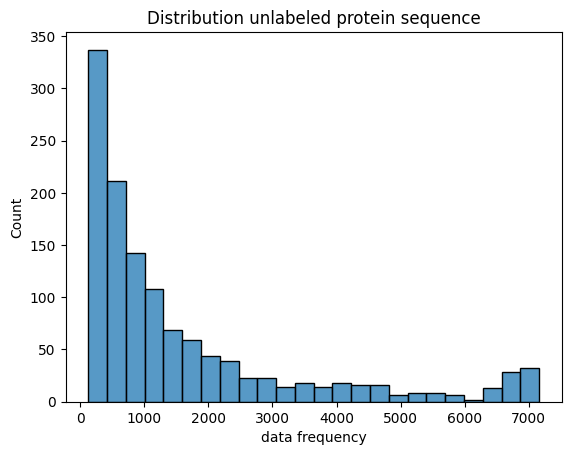

In [ ]:
sns.histplot(data=unlabel['Target Sequence'].value_counts())
plt.xlabel('data frequency')
plt.title('Distribution unlabeled protein sequence')
plt.show()

In [ ]:
train['Target Sequence'].value_counts()

,count
Target Sequence,
MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPFLGNILSYHKGFCMFDMECHKKYGKVWGFYDGQQPVLAITDPDMIKTVLVKECYSVFTNRRPFGPVGFMKSAISIAEDEEWKRLRSLLSPTFTSGKLKEMVPIIAQYGDVLVRNLRREAETGKPVTLKDVFGAYSMDVITSTSFGVNIDSLNNPQDPFVENTKKLLRFDFLDPFFLSITVFPFLIPILEVLNICVFPREVTNFLRKSVKRMKESRLEDTQKHRVDFLQLMIDSQNSKETESHKALSDLELVAQSIIFIFAGYETTSSVLSFIMYELATHPDVQQKLQEEIDAVLPNKAPPTYDTVLQMEYLDMVVNETLRLFPIAMRLERVCKKDVEINGMFIPKGVVVMIPSYALHRDPKYWTEPEKFLPERFSKKNKDNIDPYIYTPFGSGPRNCIGMRFALMNMKLALIRVLQNFSFKPCKETQIPLKLSLGGLLQPEKPVVLKVESRDGTVSGA,411
MGLEALVPLAVIVAIFLLLVDLMHRRQRWAARYPPGPLPLPGLGNLLHVDFQNTPYCFDQLRRRFGDVFSLQLAWTPVVVLNGLAAVREALVTHGEDTADRPPVPITQILGFGPRSQGVFLARYGPAWREQRRFSVSTLRNLGLGKKSLEQWVTEEAACLCAAFANHSGRPFRPNGLLDKAVSNVIASLTCGRRFEYDDPRFLRLLDLAQEGLKEESGFLREVLNAVPVLLHIPALAGKVLRFQKAFLTQLDELLTEHRMTWDPAQPPRDLTEAFLAEMEKAKGNPESSFNDENLRIVVADLFSAGMVTTSTTLAWGLLLMILHPDVQRRVQQEIDDVIGQVRRPEMGDQAHMPYTTAVIHEVQRFGDIVPLGVTHMTSRDIEVQGFRIPKGTTLITNLSSVLKDEAVWEKPFRFHPEHFLDAQGHFVKPEAFLPFSAGRRACLGEPLARMELFLFFTSLLQHFSFSVPTGQPRPSHHGVFAFLVSPSPYELCAVPR,219
MDSLVVLVLCLSCLLLLSLWRQSSGRGKLPPGPTPLPVIGNILQIGIKDISKSLTNLSKVYGPVFTLYFGLKPIVVLHGYEAVKEALIDLGEEFSGRGIFPLAERANRGFGIVFSNGKKWKEIRRFSLMTLRNFGMGKRSIEDRVQEEARCLVEELRKTKASPCDPTFILGCAPCNVICSIIFHKRFDYKDQQFLNLMEKLNENIKILSSPWIQICNNFSPIIDYFPGTHNKLLKNVAFMKSYILEKVKEHQESMDMNNPQDFIDCFLMKMEKEKHNQPSEFTIESLENTAVDLFGAGTETTSTTLRYALLLLLKHPEVTAKVQEEIERVIGRNRSPCMQDRSHMPYTDAVVHEVQRYIDLLPTSLPHAVTCDIKFRNYLIPKGTTILISLTSVLHDNKEFPNPEMFDPHHFLDEGGNFKKSKYFMPFSAGKRICVGEALAGMELFLFLTSILQNFNLKSLVDPKNLDTTPVVNGFASVPPFYQLCFIPV,209
MALSQSVPFSATELLLASAIFCLVFWVLKGLRPRVPKGLKSPPEPWGWPLLGHVLTLGKNPHLALSRMSQRYGDVLQIRIGSTPVLVLSRLDTIRQALVRQGDDFKGRPDLYTSTLITDGQSLTFSTDSGPVWAARRRLAQNALNTFSIASDPASSSSCYLEEHVSKEAKALISRLQELMAGPGHFDPYNQVVVSVANVIGAMCFGQHFPESSDEMLSLVKNTHEFVETASSGNPLDFFPILRYLPNPALQRFKAFNQRFLWFLQKTVQEHYQDFDKNSVRDITGALFKHSKKGPRASGNLIPQEKIVNLVNDIFGAGFDTVTTAISWSLMYLVTKPEIQRKIQKELDTVIGRERRPRLSDRPQLPYLEAFILETFRHSSFLPFTIPHSTTRDTTLNGFYIPKKCCVFVNQWQVNHDPELWEDPSEFRPERFLTADGTAINKPLSEKMMLFGMGKRRCIGEVLAKWEIFLFLAILLQQLEFSVPPGVKVDLTPIYGLTMKHARCEHVQARLRFSIN,181
MDPFVVLVLCLSCLLLLSIWRQSSGRGKLPPGPTPLPVIGNILQIDIKDVSKSLTNLSKIYGPVFTLYFGLERMVVLHGYEVVKEALIDLGEEFSGRGHFPLAERANRGFGIVFSNGKRWKEIRRFSLMTLRNFGMGKRSIEDRVQEEARCLVEELRKTKASPCDPTFILGCAPCNVICSIIFQKRFDYKDQQFLNLMEKLNENIRIVSTPWIQICNNFPTIIDYFPGTHNKLLKNLAFMESDILEKVKEHQESMDINNPRDFIDCFLIKMEKEKQNQQSEFTIENLVITAADLLGAGTETTSTTLRYALLLLLKHPEVTAKVQEEIERVVGRNRSPCMQDRGHMPYTDAVVHEVQRYIDLIPTSLPHAVTCDVKFRNYLIPKGTTILTSLTSVLHDNKEFPNPEMFDPRHFLDEGGNFKKSNYFMPFSAGKRICVGEGLARMELFLFLTFILQNFNLKSLIDPKDLDTTPVVNGFASVPPFYQLCFIPV,158
...,...
MNPAAEAEFNILLATDSYKVTHYKQYPPNTSKVYSYFECREKKTENSKLRKVKYEETVFYGLQYILNKYLKGKVVTKEKIQEAKDVYKEHFQDDVFNEKGWNYILEKYDGHLPIEIKAVPEGFVIPRGNVLFTVENTDPECYWLTNWIETILVQSWYPITVATNSREQKKILAKYLLETSGNLDGLEYKLHDFGYRGVSSQETAGIGASAHLVNFKGTDTVAGLALIKKYYGTKDPVPGYSVPAAEHSTITAWGKDHEKDAFEHIVTQFSSVPVSVVSDSYDIYNACEKIWGEDLRHLIVSRSTQAPLIIRPDSGNPLDTVLKVLEILGKKFPVTENSKGYKLLPPYLRVIQGDGVDINTLQEIVEGMKQKMWSIENIAFGSGGGLLQKLTRDLLNCSFKCSYVVTNGLGINVFKDPVADPNKRSKKGRLSLHRTPAGNFVTLEEGKGDLEEYGQDLLHTVFKNGKVTKSYSFDEIRKNAQLNIELEAAHH,1
MLLSQNAFIFRSLNLVLMVYISLVFGISYDSPDYTDESCTFKISLRNFRSILSWELKNHSIVPTHYTLLYTIMSKPEDLKVVKNCANTTRSFCDLTDEWRSTHEAYVTVLEGFSGNTTLFSCSHNFWLAIDMSFEPPEFEIVGFTNHINVMVKFPSIVEEELQFDLSLVIEEQSEGIVKKHKPEIKGNMSGNFTYIIDKLIPNTNYCVSVYLEHSDEQAVIKSPLKCTLLPPGQESESAESAKIGGIITVFLIALVLTSTIVTLKWIGYICLRNSLPKVLNFHNFLAWPFPNLPPLEAMDMVEVIYINRKKKVWDYNYDDESDSDTEAAPRTSGGGYTMHGLTVRPLGQASATSTESQLIDPESEEEPDLPEVDVELPTMPKDSPQQLELLSGPCERRKSPLQDPFPEEDYSSTEGSGGRITFNVDLNSVFLRVLDDEDSDDLEAPLMLSSHLEEMVDPEDPDNVQSNHLLASGEGTQPTFPSPSSEGLWSEDAPSDQSDTSESDVDLGDGYIMR,1
MSIMSYNGGAVMAMKGKNCVAIAADRRFGIQAQMVTTDFQKIFPMGDRLYIGLAGLATDVQTVAQRLKFRLNLYELKEGRQIKPYTLMSMVANLLYEKRFGPYYTEPVIAGLDPKTFKPFICSLDLIGCPMVTDDFVVSGTCAEQMYGMCESLWEPNMDPDHLFETISQAMLNAVDRDAVSGMGVIVHIIEKDKITTRTLKARMD,1


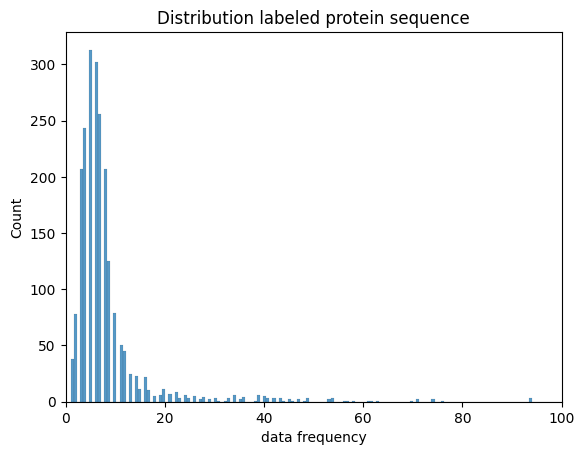

In [ ]:
sns.histplot(data=train['Target Sequence'].value_counts())
plt.xlabel('data frequency')
plt.title('Distribution labeled protein sequence')
plt.xlim(0,100)
plt.show()

#3.comparison1 data

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
os.chdir('/content/drive/MyDrive/mini/new_test0')

In [ ]:
loss1=pd.read_csv('loss1.csv')
loss2=pd.read_csv('loss2.csv')
loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss1v=pd.read_csv('loss1v.csv')
loss2v=pd.read_csv('loss2v.csv')
loss3v=pd.read_csv('loss3v.csv')
loss4v=pd.read_csv('loss4v.csv')
compa1=pd.read_csv('loss_comparison.csv')
compa2=pd.read_csv('loss_comparison2.csv')
compa1v=pd.read_csv('loss_comparisonv.csv')
compa2v=pd.read_csv('loss_comparison2v.csv')

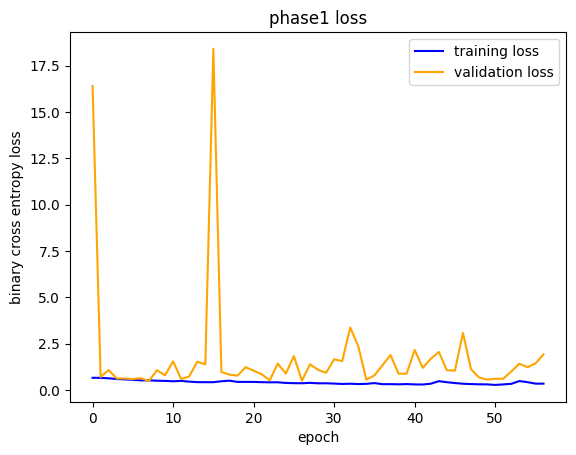

In [ ]:
sns.lineplot(data=loss1['0'], color='blue', label='training loss')
sns.lineplot(data=loss1v['0'], color='orange', label='validation loss')

plt.title('phase1 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#27 epoch AUROC: 0.8652930780741024

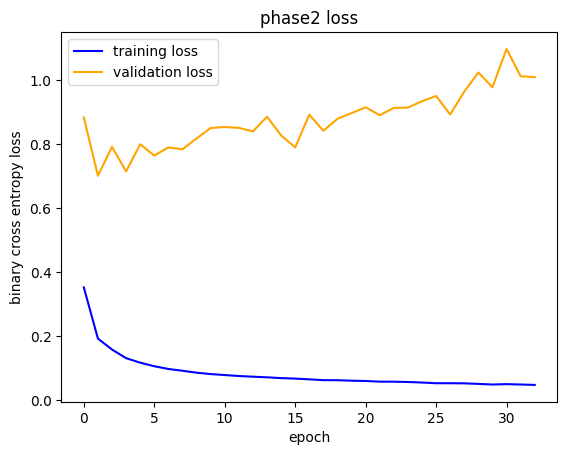

In [ ]:
sns.lineplot(data=loss2['0'], color='blue', label='training loss')
sns.lineplot(data=loss2v['0'], color='orange', label='validation loss')

plt.title('phase2 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#epoch3 AUROC: 0.8642193851019346

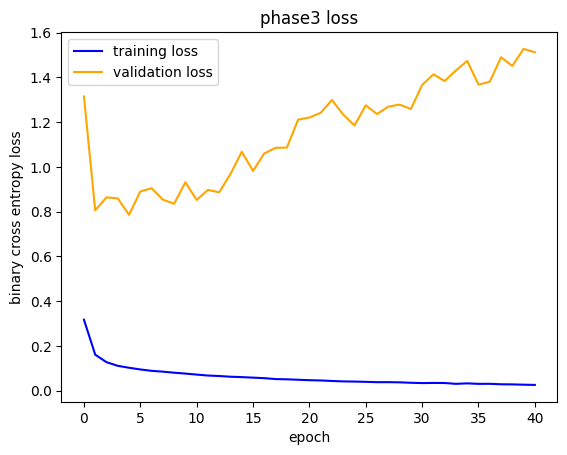

In [ ]:
sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=loss3v['0'], color='orange', label='validation loss')

plt.title('phase3 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#11 epoch AUROC: 0.8633118283224605

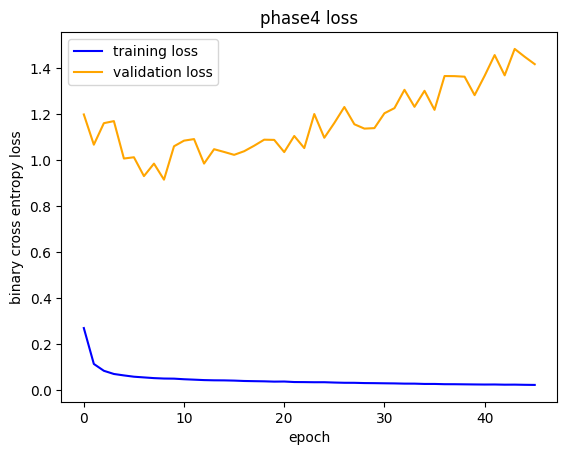

In [ ]:
sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=loss4v['0'], color='orange', label='validation loss')

plt.title('phase4 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#16 epoch AUROC: 0.858904033379694

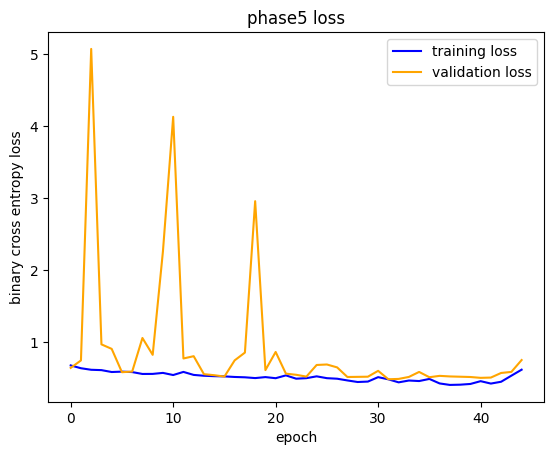

In [ ]:
sns.lineplot(data=compa1['0'], color='blue', label='training loss')
sns.lineplot(data=compa1v['0'], color='orange', label='validation loss')

plt.title('phase5 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#epoch15 AUROC: 0.8510481515463134

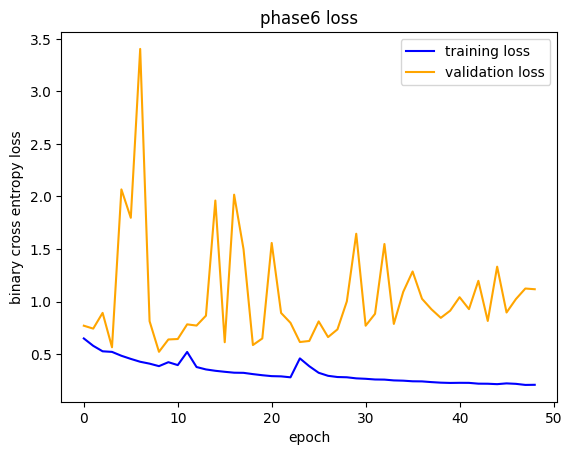

In [ ]:
sns.lineplot(data=compa2['0'], color='blue', label='training loss')
sns.lineplot(data=compa2v['0'], color='orange', label='validation loss')

plt.title('phase6 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#19 epoch AUROC: 0.8641479099678456

##3.1 comparison1 data new / random seed

In [ ]:
os.chdir('/content/drive/MyDrive/mini/new_test00')

In [ ]:
loss1=pd.read_csv('loss1.csv')
loss2=pd.read_csv('loss2.csv')
loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss1v=pd.read_csv('loss1v.csv')
loss2v=pd.read_csv('loss2v.csv')
loss3v=pd.read_csv('loss3v.csv')
loss4v=pd.read_csv('loss4v.csv')
compa1=pd.read_csv('loss_comparison.csv')
compa2=pd.read_csv('loss_comparison2.csv')
compa1v=pd.read_csv('loss_comparisonv.csv')
compa2v=pd.read_csv('loss_comparison2v.csv')
compa3=pd.read_csv('loss_comparison3.csv')
compa3v=pd.read_csv('loss_comparison3v.csv')

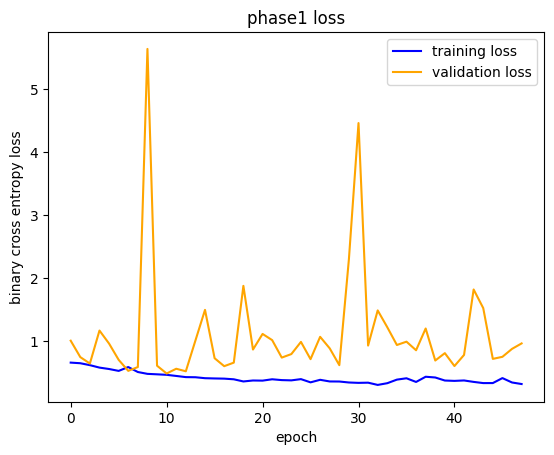

In [ ]:
sns.lineplot(data=loss1['0'], color='blue', label='training loss')
sns.lineplot(data=loss1v['0'], color='orange', label='validation loss')

plt.title('phase1 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#18 epoch AUROC: 0.8622

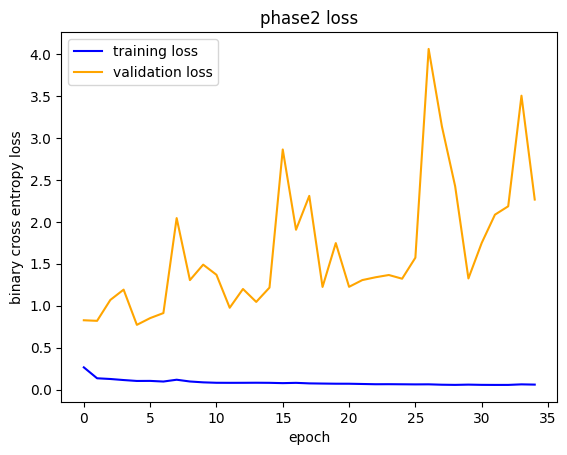

In [ ]:
sns.lineplot(data=loss2['0'], color='blue', label='training loss')
sns.lineplot(data=loss2v['0'], color='orange', label='validation loss')

plt.title('phase2 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#5 epoch AUROC : 0.8562

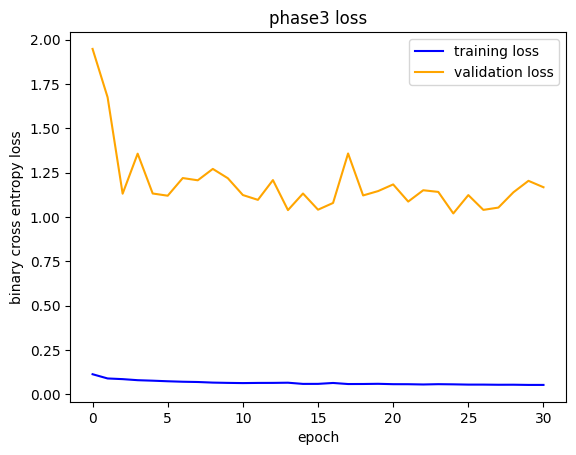

In [ ]:
sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=loss3v['0'], color='orange', label='validation loss')

plt.title('phase3 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#1 epoch AUROC : 0.8454

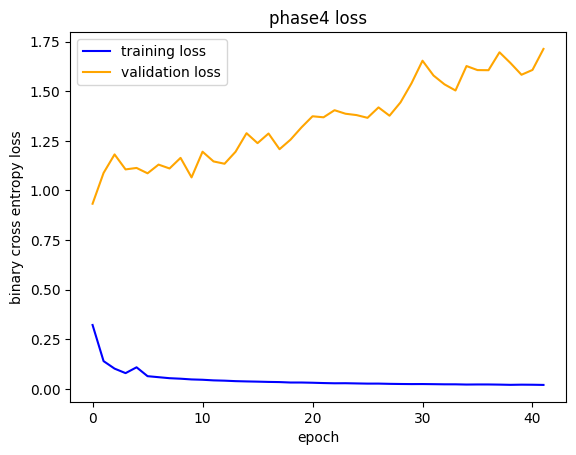

In [ ]:
sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=loss4v['0'], color='orange', label='validation loss')

plt.title('phase4 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#12 epoch AUROC : 0.8465

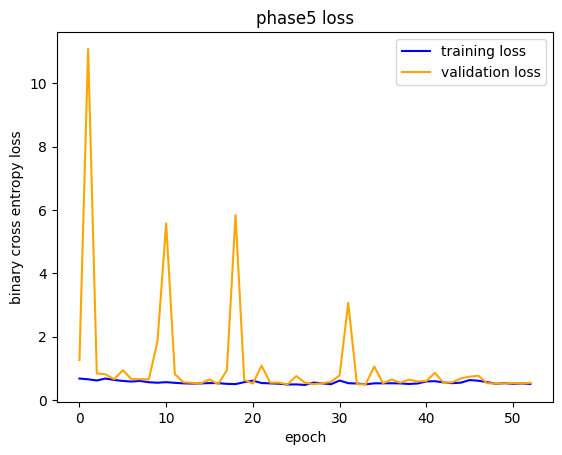

In [ ]:
sns.lineplot(data=compa1['0'], color='blue', label='training loss')
sns.lineplot(data=compa1v['0'], color='orange', label='validation loss')

plt.title('phase5 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#23 epoch AUROC : 0.8560

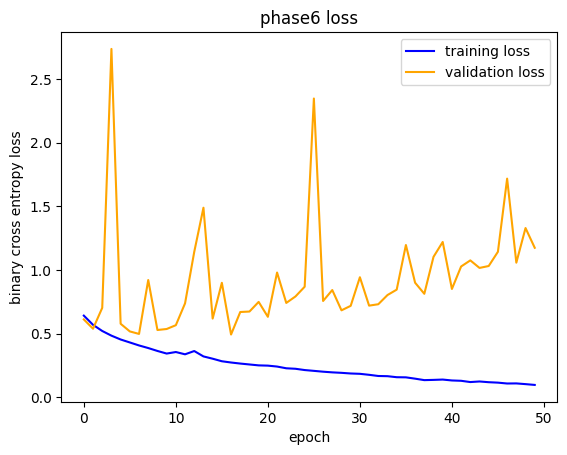

In [ ]:
sns.lineplot(data=compa2['0'], color='blue', label='training loss')
sns.lineplot(data=compa2v['0'], color='orange', label='validation loss')

plt.title('phase6 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#20 epoch AUROC : 0.8696

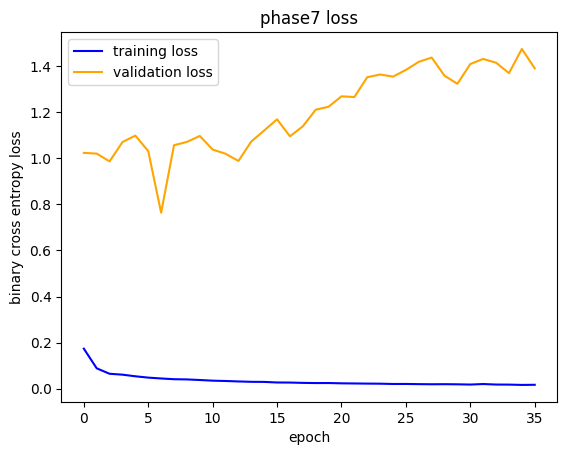

In [ ]:
sns.lineplot(data=compa3['0'], color='blue', label='training loss')
sns.lineplot(data=compa3v['0'], color='orange', label='validation loss')

plt.title('phase7 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 8 epoch AUROC: 0.865775722800958

#4.comparison2 data+architecture

In [ ]:
os.chdir('../new_test1')

loss1=pd.read_csv('loss1.csv')
loss2=pd.read_csv('loss2.csv')
loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss1v=pd.read_csv('loss1v.csv')
loss2v=pd.read_csv('loss2v.csv')
loss3v=pd.read_csv('loss3v.csv')
loss4v=pd.read_csv('loss4v.csv')
compa1=pd.read_csv('loss_comparison.csv')
compa2=pd.read_csv('loss_comparison2.csv')
compa1v=pd.read_csv('loss_comparisonv.csv')
compa2v=pd.read_csv('loss_comparison2v.csv')
compa3=pd.read_csv('loss_comparison3.csv')
compa3v=pd.read_csv('loss_comparison3v.csv')

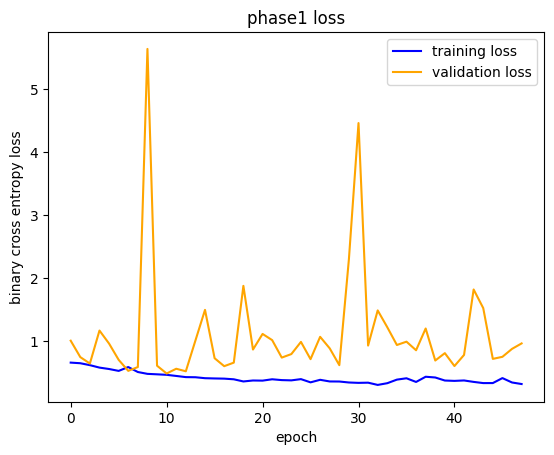

In [ ]:
sns.lineplot(data=loss1['0'], color='blue', label='training loss')
sns.lineplot(data=loss1v['0'], color='orange', label='validation loss')

plt.title('phase1 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#18 epoch AUROC: 0.8621885461759351

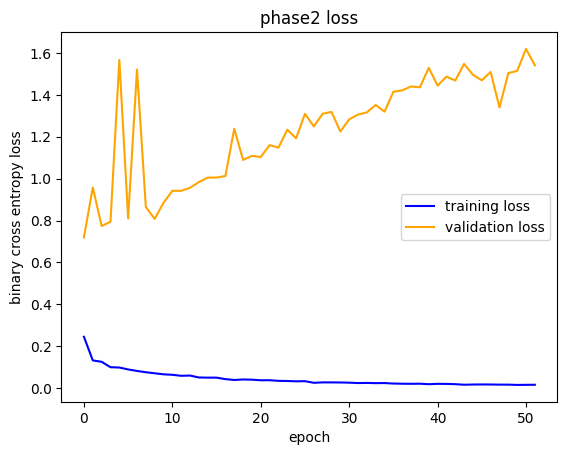

In [ ]:
sns.lineplot(data=loss2['0'], color='blue', label='training loss')
sns.lineplot(data=loss2v['0'], color='orange', label='validation loss')

plt.title('phase2 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#22 epoch AUROC: 0.8603985608821605

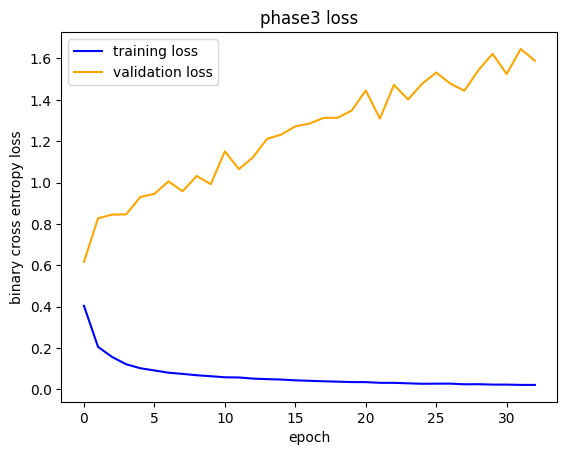

In [ ]:
sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=loss3v['0'], color='orange', label='validation loss')

plt.title('phase3 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#3 epoch AUROC: 0.8588024908462251

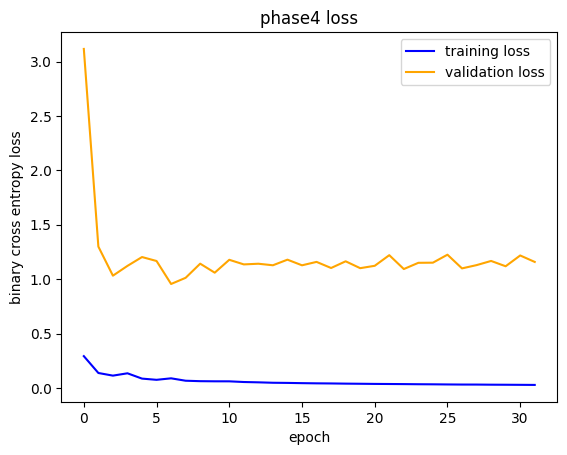

In [ ]:
sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=loss4v['0'], color='orange', label='validation loss')

plt.title('phase4 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 2 epoch AUROC: 0.8419945260192392

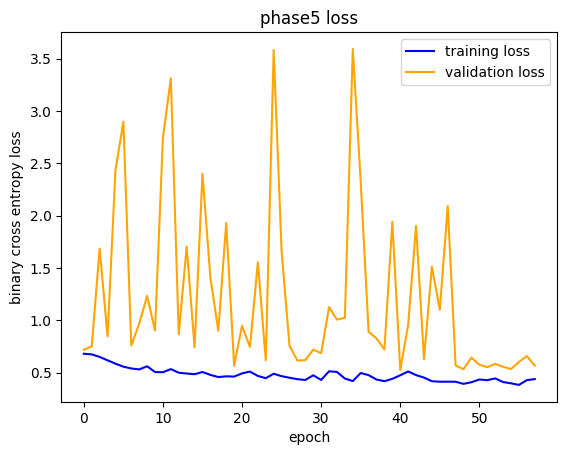

In [ ]:
sns.lineplot(data=compa1['0'], color='blue', label='training loss')
sns.lineplot(data=compa1v['0'], color='orange', label='validation loss')

plt.title('phase5 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#28 epoch AUROC: 0.8628197154709343

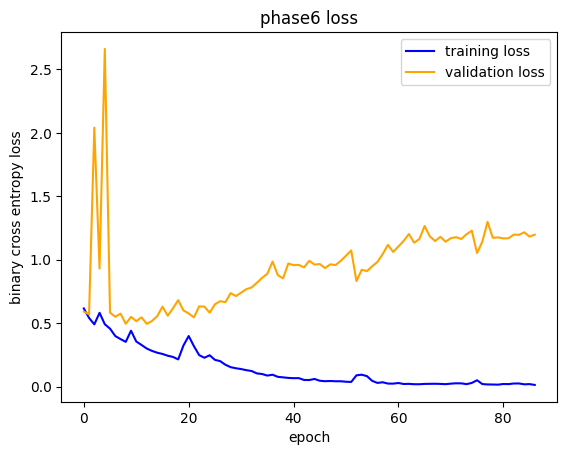

In [ ]:
sns.lineplot(data=compa2['0'], color='blue', label='training loss')
sns.lineplot(data=compa2v['0'], color='orange', label='validation loss')

plt.title('phase6 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#57epoch AUROC: 0.8805892914896226

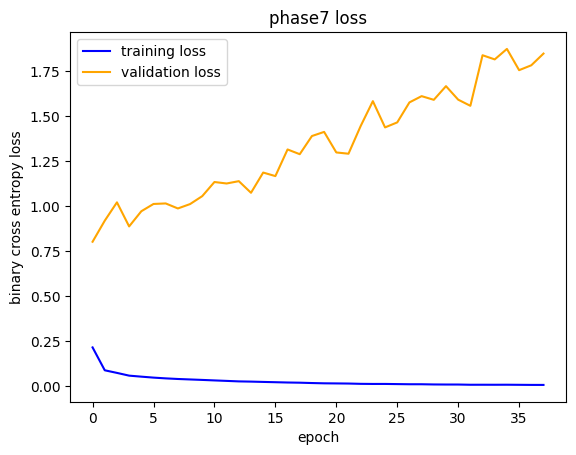

In [ ]:
sns.lineplot(data=compa3['0'], color='blue', label='training loss')
sns.lineplot(data=compa3v['0'], color='orange', label='validation loss')

plt.title('phase7 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 6 epcoh AUROC: 0.859430529700457

#5.comparison noise

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('/content/drive/MyDrive/mini/new_test_noise')

loss1=pd.read_csv('loss1.csv')
loss2=pd.read_csv('loss2.csv')
loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss1v=pd.read_csv('loss1v.csv')
loss2v=pd.read_csv('loss2v.csv')
loss3v=pd.read_csv('loss3v.csv')
loss4v=pd.read_csv('loss4v.csv')
compa1=pd.read_csv('loss_comparison.csv')
compa2=pd.read_csv('loss_comparison2.csv')
compa1v=pd.read_csv('loss_comparisonv.csv')
compa2v=pd.read_csv('loss_comparison2v.csv')
compa3=pd.read_csv('loss_comparison3.csv')
compa3v=pd.read_csv('loss_comparison3v.csv')

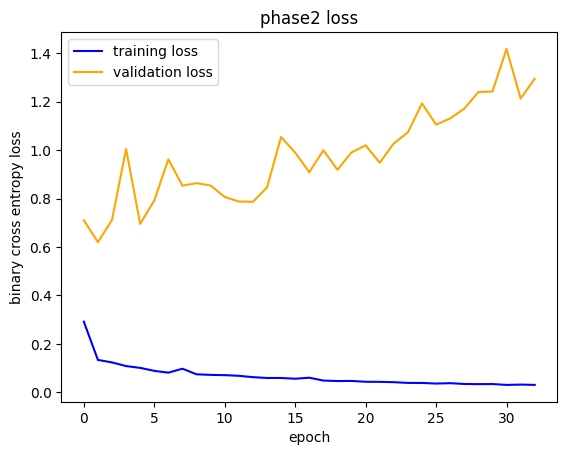

In [ ]:
sns.lineplot(data=loss2['0'], color='blue', label='training loss')
sns.lineplot(data=loss2v['0'], color='orange', label='validation loss')

plt.title('phase2 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#3 epoch AUROC : 0.862640530105617

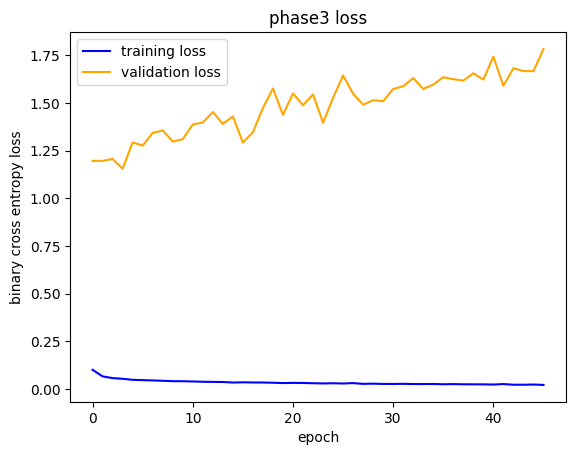

In [ ]:
sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=loss3v['0'], color='orange', label='validation loss')

plt.title('phase3 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#16 epoch AUROC : 0.8460098930027173

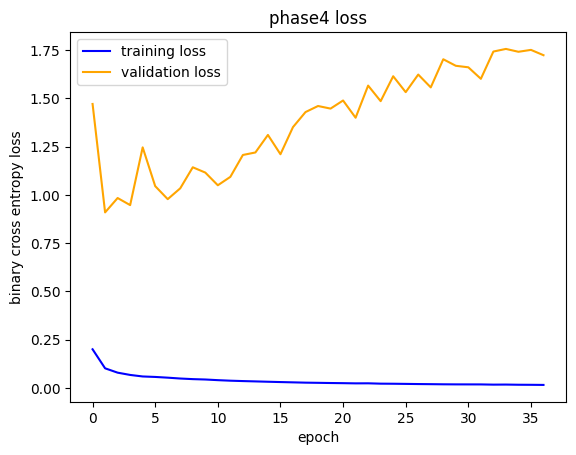

In [ ]:
sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=loss4v['0'], color='orange', label='validation loss')

plt.title('phase4 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#7 epoch AUROC: 0.8417312143874642

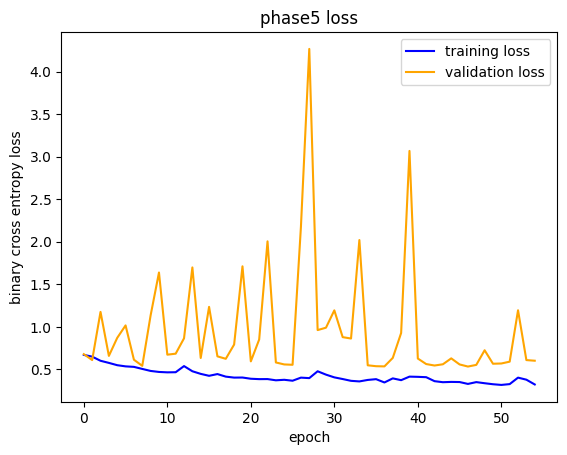

In [ ]:
sns.lineplot(data=compa1['0'], color='blue', label='training loss')
sns.lineplot(data=compa1v['0'], color='orange', label='validation loss')

plt.title('phase5 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#25 epoch AUROC : : 0.8502045399032413

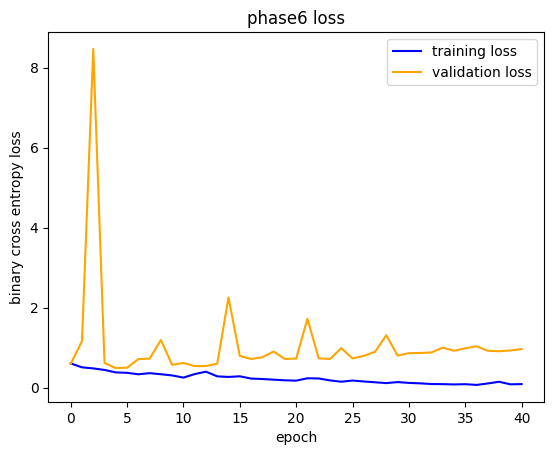

In [ ]:
sns.lineplot(data=compa2['0'], color='blue', label='training loss')
sns.lineplot(data=compa2v['0'], color='orange', label='validation loss')

plt.title('phase6 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#11 epoch AUROC: 0.8605136497372952

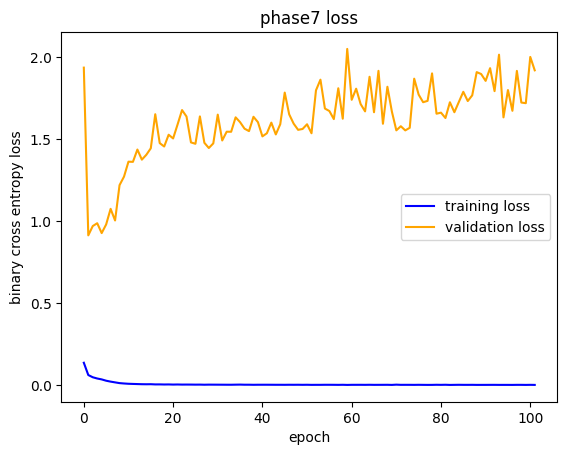

In [ ]:
sns.lineplot(data=compa3['0'], color='blue', label='training loss')
sns.lineplot(data=compa3v['0'], color='orange', label='validation loss')

plt.title('phase7 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 72 epoch AUROC: 0.8744825053418802

#6.comparison threshold

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('/content/drive/MyDrive/mini/new_test_param')

loss1=pd.read_csv('loss1.csv')
loss2=pd.read_csv('loss2.csv')
loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss1v=pd.read_csv('loss1v.csv')
loss2v=pd.read_csv('loss2v.csv')
loss3v=pd.read_csv('loss3v.csv')
loss4v=pd.read_csv('loss4v.csv')
compa3=pd.read_csv('loss_comparison2.csv')
compa3v=pd.read_csv('loss_comparison2v.csv')

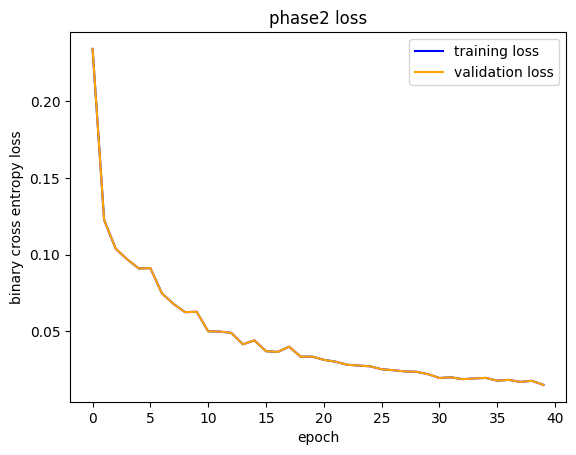

In [ ]:
sns.lineplot(data=loss2['0'], color='blue', label='training loss')
sns.lineplot(data=loss2['0'], color='orange', label='validation loss')

plt.title('phase2 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 10 epoch AUROC: 0.8681083205847357

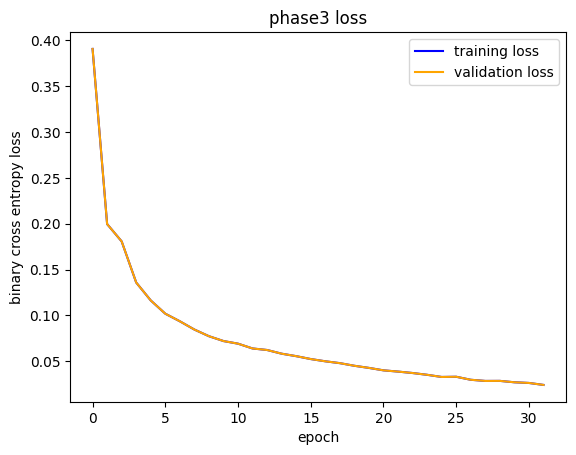

In [ ]:
sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=loss3['0'], color='orange', label='validation loss')

plt.title('phase3 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 2 epoch AUROC: 0.8480113062790228

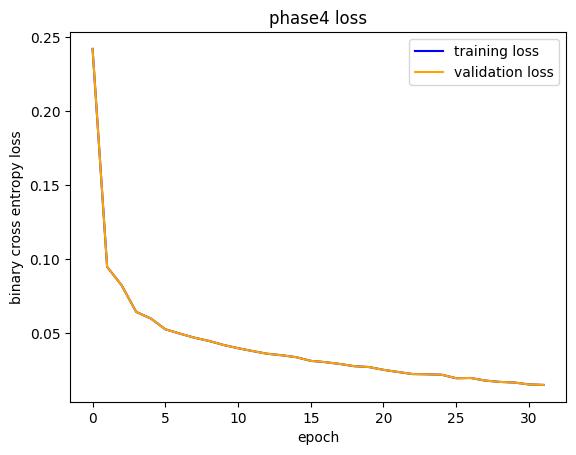

In [ ]:
sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=loss4['0'], color='orange', label='validation loss')

plt.title('phase4 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 2 epoch AUROC: 0.84843804327476

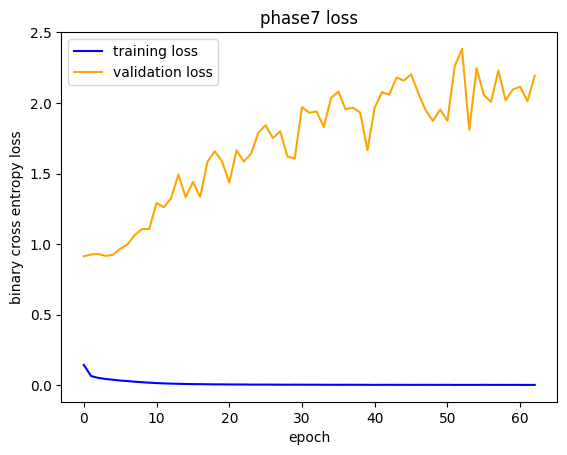

In [ ]:
sns.lineplot(data=compa3['0'], color='blue', label='training loss')
sns.lineplot(data=compa3v['0'], color='orange', label='validation loss')

plt.title('phase7 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

# 33 epoch AUROC: 0.8751781591889991

#7.comparison accuracy

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('/content/drive/MyDrive/mini/new_test_acc')

loss1=pd.read_csv('loss1.csv')
loss2=pd.read_csv('loss2.csv')
loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss1v=pd.read_csv('loss1v.csv')
loss2v=pd.read_csv('loss2v.csv')
loss3v=pd.read_csv('loss3v.csv')
loss4v=pd.read_csv('loss4v.csv')
compa1=pd.read_csv('loss_comparison.csv')
compa1v=pd.read_csv('loss_comparisonv.csv')

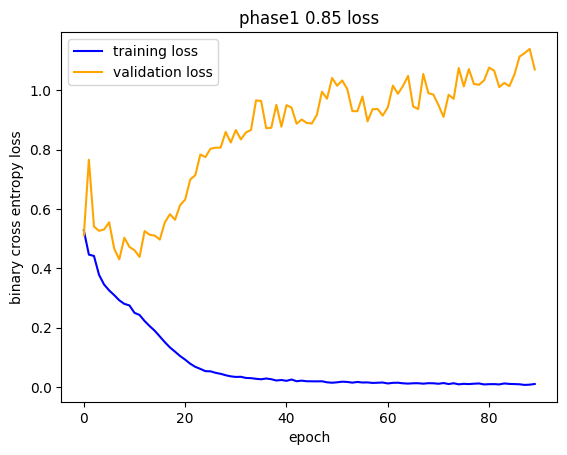

In [2]:
sns.lineplot(data=loss1['0'], color='blue', label='training loss')
sns.lineplot(data=loss1v['0'], color='orange', label='validation loss')

plt.title('phase1 0.85 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#epoch 60 AUROC: 0.9162790334665335

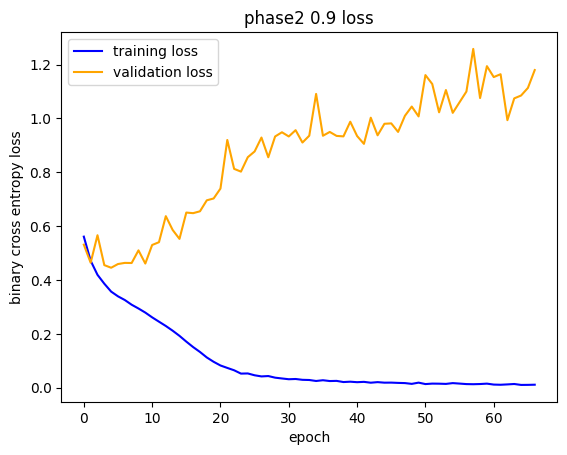

In [4]:
sns.lineplot(data=loss2['0'], color='blue', label='training loss')
sns.lineplot(data=loss2v['0'], color='orange', label='validation loss')

plt.title('phase2 0.9 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#39 37 epoch AUROC: 0.921198971176906 AUROC: 0.9163110690212245

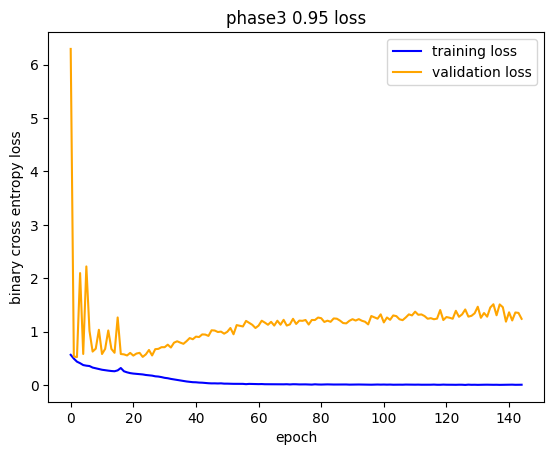

In [3]:
sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=loss3v['0'], color='orange', label='validation loss')

plt.title('phase3 0.95 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#30 115 epoch AUROC: 0.9243637893686982  AUROC: 0.9118544048831927

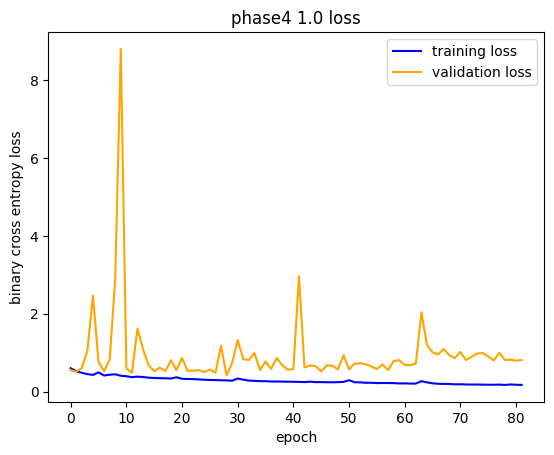

In [2]:
sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=loss4v['0'], color='orange', label='validation loss')

plt.title('phase4 1.0 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#14 52 epoch AUROC: 0.9225357918778898 AUROC: 0.9042824074074075

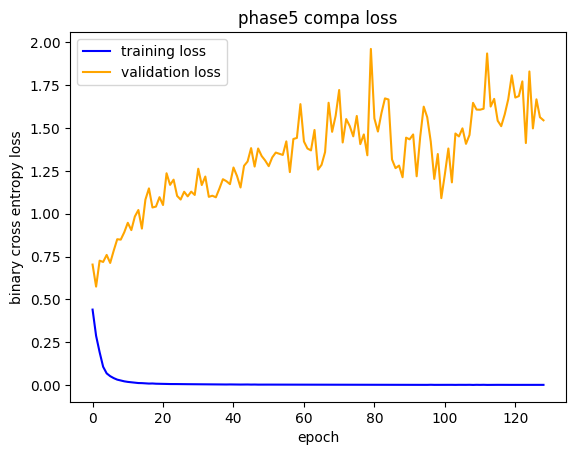

In [2]:
sns.lineplot(data=compa1['0'], color='blue', label='training loss')
sns.lineplot(data=compa1v['0'], color='orange', label='validation loss')

plt.title('phase5 compa loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()
# 99 epoch AUROC: 0.9227989663161646

#8.comparison accuracy2

In [3]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('/content/drive/MyDrive/mini/new_test_acc2')

loss1=pd.read_csv('loss1.csv')
loss2=pd.read_csv('loss2.csv')
loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss1v=pd.read_csv('loss1v.csv')
loss2v=pd.read_csv('loss2v.csv')
loss3v=pd.read_csv('loss3v.csv')
loss4v=pd.read_csv('loss4v.csv')
compa1=pd.read_csv('loss_comparison.csv')
compa1v=pd.read_csv('loss_comparisonv.csv')

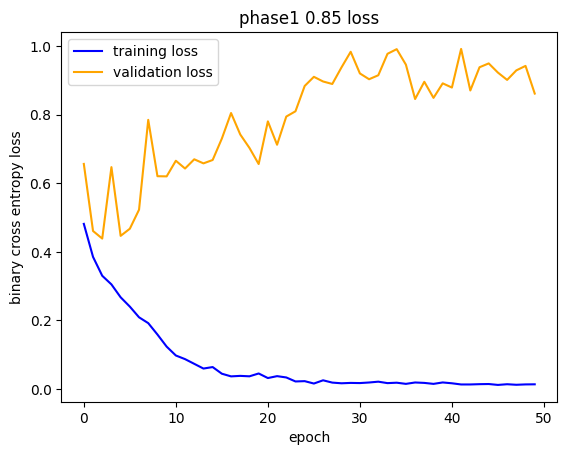

In [2]:
sns.lineplot(data=loss1['0'], color='blue', label='training loss')
sns.lineplot(data=loss1v['0'], color='orange', label='validation loss')

plt.title('phase1 0.85 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#20 epoch AUROC: 0.9161680111265645

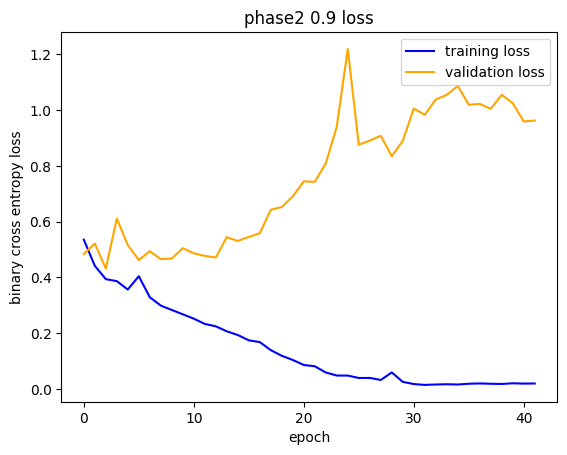

In [3]:
sns.lineplot(data=loss2['0'], color='blue', label='training loss')
sns.lineplot(data=loss2v['0'], color='orange', label='validation loss')

plt.title('phase2 0.9 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#12 epoch AUROC: 0.8968123423110184

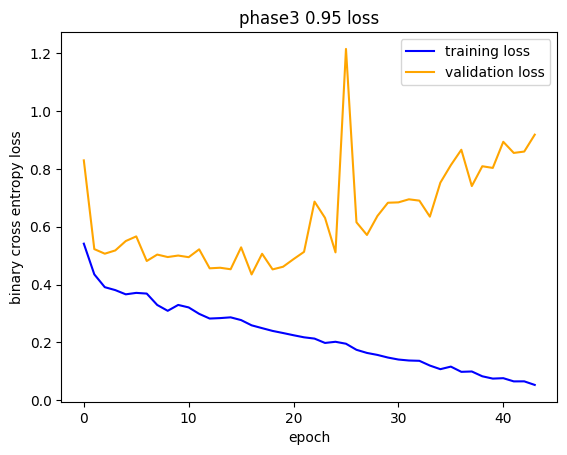

In [4]:
sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=loss3v['0'], color='orange', label='validation loss')

plt.title('phase3 0.95 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#14 epoch AUROC: 0.9019686853687696

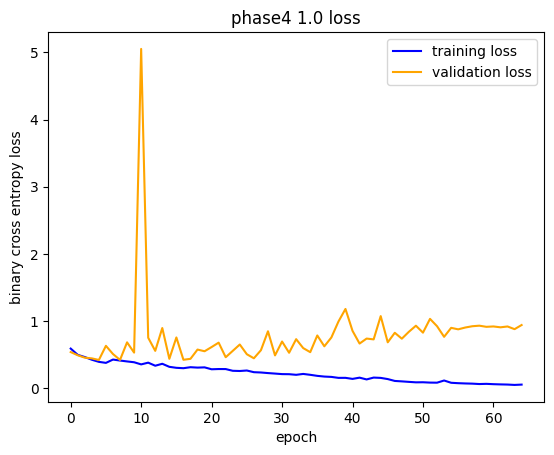

In [5]:
sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=loss4v['0'], color='orange', label='validation loss')

plt.title('phase4 1.0 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#35 epoch AUROC: 0.9031161208148142

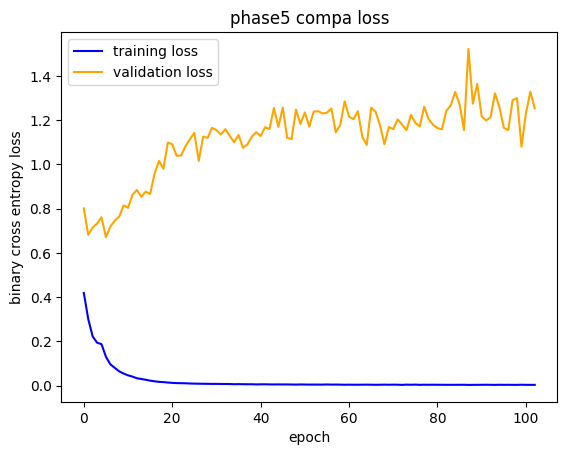

In [4]:
sns.lineplot(data=compa1['0'], color='blue', label='training loss')
sns.lineplot(data=compa1v['0'], color='orange', label='validation loss')

plt.title('phase5 compa loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#73 epoch AUROC: 0.907215736945286

#9.comparison accuracy3

In [5]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('/content/drive/MyDrive/mini/new_test_acc3')

loss3=pd.read_csv('loss3.csv')
loss4=pd.read_csv('loss4.csv')
loss3v=pd.read_csv('loss3v.csv')
loss4v=pd.read_csv('loss4v.csv')
loss30=pd.read_csv('loss30.csv')
loss31=pd.read_csv('loss31.csv')
loss30v=pd.read_csv('loss30v.csv')
loss31v=pd.read_csv('loss31v.csv')

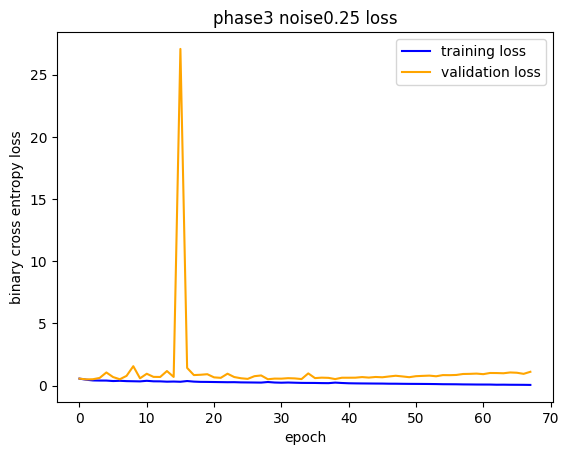

In [6]:
sns.lineplot(data=loss3['0'], color='blue', label='training loss')
sns.lineplot(data=loss3v['0'], color='orange', label='validation loss')

plt.title('phase3 noise0.25 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#38 epoch AUROC: 0.9033814272185393

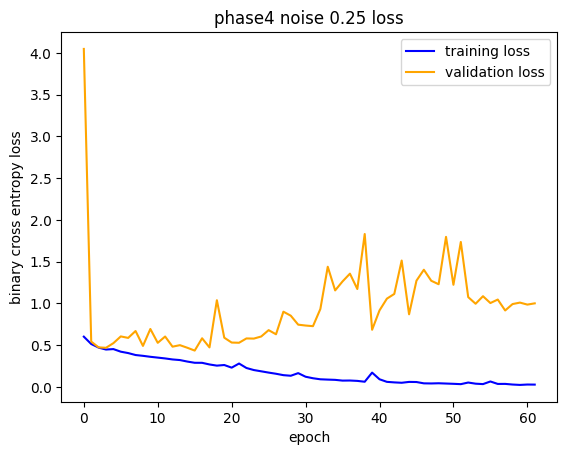

In [8]:
sns.lineplot(data=loss4['0'], color='blue', label='training loss')
sns.lineplot(data=loss4v['0'], color='orange', label='validation loss')

plt.title('phase4 noise 0.25 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#32 epoch AUROC: 0.9190151508403774

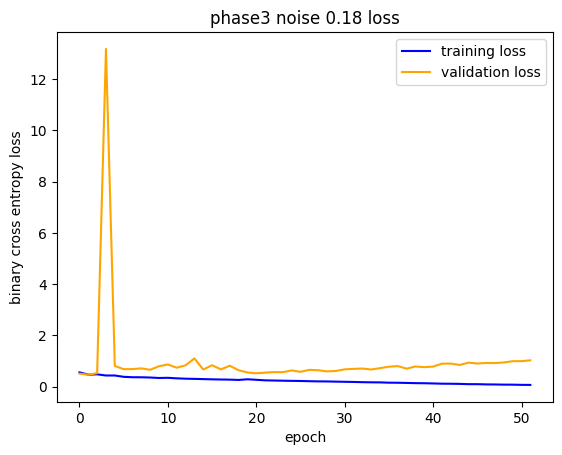

In [9]:
sns.lineplot(data=loss30['0'], color='blue', label='training loss')
sns.lineplot(data=loss30v['0'], color='orange', label='validation loss')

plt.title('phase3 noise 0.18 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#22 epoch AUROC: 0.9031277847086081

In [ ]:
sns.lineplot(data=loss31['0'], color='blue', label='training loss')
sns.lineplot(data=loss31v['0'], color='orange', label='validation loss')

plt.title('phase3 noise 0.22 loss')
plt.xlabel('epoch')
plt.ylabel('binary cross entropy loss')
plt.legend()

plt.show()

#49 epoch AUROC: 0.9183396164161237